## A* Search

---

### Overview

This notebook contains an implementation of the A* search algorithm to find a path through a maze that visits all four corners. The maze is represented as a grid, where certain cells are walls that cannot be passed through. The algorithm uses a heuristic function to estimate the cost from a cell to the closest unvisited corner, guiding the search towards the corners. The implementation includes functions for calculating the heuristic cost estimate, reconstructing the path, finding neighboring cells, and performing the A* search.


### Heuristic function

In this implementation, the heuristic function calculates the Manhattan distance from a cell to the closest unvisited corner. The algorithm maintains an open set of cells to explore, prioritizing cells with lower estimated total cost (`g_score + h_score`), where `g_score` is the cost from the start cell to the current cell and `h_score` is the heuristic cost estimate from the current cell to the goal.


### Search Algorithm

At each step, the algorithm selects the cell with the lowest total cost from the open set, explores its neighbors, and updates their `g_scores` and `f_scores` if a shorter path is found. The search continues until the goal (a corner cell) is reached. The algorithm then backtracks through the `came_from` dictionary to reconstruct the optimal path from the start cell to the goal cell.

The algorithm repeats this process for each unvisited corner, ensuring that the path passes through all four corners. The visualization module `maze_visualizer` is used to display the maze and the path found by the algorithm.

<br/>

---

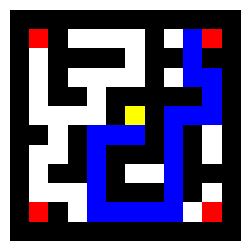

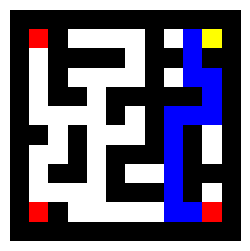

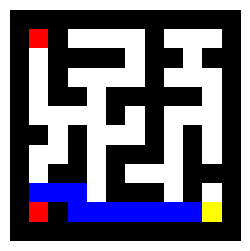

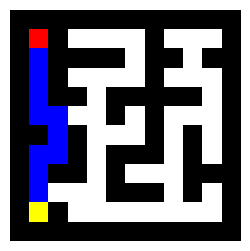

61

In [1]:
from maze_visualizer import *
import heapq


def heuristic_cost_estimate(point, corners):
    # If corners is a single tuple, convert it to a list with one tuple
    if isinstance(corners, tuple):
        corners = [corners]
        
    # Calculate the Manhattan distance from the point to the closest unvisited corner
    closest_corner = min(corners, key=lambda x: abs(point[0] - x[0]) + abs(point[1] - x[1]))
    return abs(point[0] - closest_corner[0]) + abs(point[1] - closest_corner[1])


def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.insert(0, current)
    return total_path


def a_star_search(grid, start):    
    # Define the four corners of the maze
    corners = [(1, 1), (1, len(grid[0])-2), (len(grid)-2, 1), (len(grid)-2, len(grid[0])-2)]
    unvisited_corners = set(corners)
    path = []

    while unvisited_corners:
        closest_corner = min(unvisited_corners, key=lambda x: heuristic_cost_estimate(start, x))
        goal = closest_corner

        open_set = []
        heapq.heappush(open_set, (0, start))  # (f_score, node)
        came_from = {}
        g_score = {start: 0}
        f_score = {start: heuristic_cost_estimate(start, goal)}

        while open_set:
            current_f, current = heapq.heappop(open_set)
            if current == goal:
                break

            for neighbor in neighbors(grid, current):
                tentative_g_score = g_score[current] + 1  # Assuming all movements have a cost of 1
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic_cost_estimate(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

        path.append(reconstruct_path(came_from, current))
        start = current
        unvisited_corners.remove(current)

    return path


def neighbors(grid, cell):
    neighbors = []
    for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        x, y = cell[0] + dx, cell[1] + dy
        if 0 <= x < len(grid) and 0 <= y < len(grid[0]) and grid[x][y] != 1:
            neighbors.append((x, y))
    return neighbors


# A* search
start = (5, 6)
path = a_star_search(sample_maze, start)
show_solution(sample_maze, start, path)
count_steps(path)